In [72]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import r2_score

In [73]:
df = pd.read_csv(r"C:\Users\Administrator.DAI-PC2\Downloads\Shubham\Practical Machine Learning\ClassWork\Cases\Concrete Strength\Concrete_Data.csv")
df.head()

,Cement,Blast,Fly,Water,Superplasticizer,Coarse,Fine,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [74]:
#### Cross val score with 5 fold validation with outliers

In [75]:
y = df["Strength"]
X = df.drop('Strength',axis=1)

In [76]:
lr = LinearRegression()
kfold = KFold(n_splits =5, shuffle=True, random_state=24)
score = cross_val_score(lr,X,y,cv = kfold,scoring='r2')
score.mean()

0.6066065590942402

In [77]:
#### Cross val score with 5 fold validation without outliers

In [78]:
clf = IsolationForest(contamination=0.05, random_state=24)
clf.fit(df)
predictions = clf.predict(df)

print("%age of outliers="+ str((predictions<0).mean()*100)+ "%")
abn_ind = np.where(predictions < 0)
print("Outliers:")
outliers = df.index[abn_ind]
print(outliers)

%age of outliers=5.048543689320388%
Outliers:
Index([  0,   3,  34,  41,  42,  56,  63,  66,  74,  76,  79,  85,  97,  99,
       102, 108, 120, 122, 125, 143, 145, 148, 154, 163, 166, 168, 171, 173,
       176, 181, 224, 228, 380, 391, 501, 504, 506, 753, 754, 755, 756, 795,
       797, 798, 820, 828, 890, 923, 932, 933, 935, 953],
      dtype='int64')


[0.28501242 0.46202177 0.62953165 0.75630151 0.87524001 0.97401444
 0.99624465 1.        ]


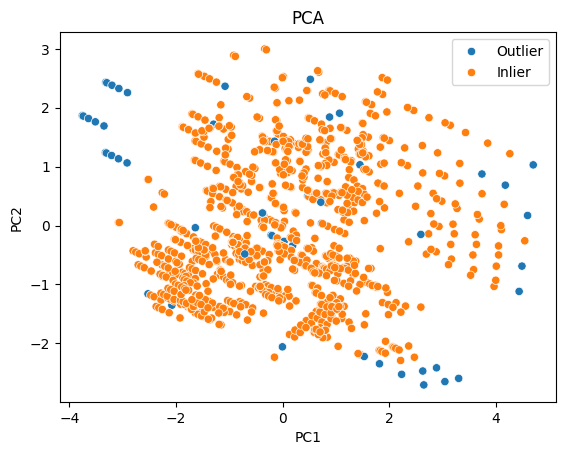

In [80]:
###### Visualization of Outliers ################
scaler = StandardScaler()
scaled_df = scaler.fit_transform(X)
prcomp = PCA()
scores = prcomp.fit_transform(scaled_df)

print(np.cumsum(prcomp.explained_variance_ratio_))

obs = np.where(predictions == 1, "Inlier", "Outlier")
PCs = pd.DataFrame({'PC1':scores[:,0], 'PC2':scores[:,1],
                    'Class':obs})

sns.scatterplot(data=PCs, x='PC1',
                y='PC2', hue='Class')
plt.legend(loc='best')
plt.title("PCA")
plt.show()

In [70]:
df = df.drop(outliers)
y = df["Strength"]
X = df.drop('Strength',axis=1)

lr = LinearRegression()
kfold = KFold(n_splits =5, shuffle=True, random_state=24)
score = cross_val_score(lr,X,y,cv=kfold,scoring='r2')
score.mean()

0.6077466573709547